# Correlate wind data from Neah Bay DFO buoy 46206

In [1]:
# import modules

import xarray as xr
import datetime as dt
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.dates as pldates
import scipy.signal as sig
import numpy as np
import pandas as pd
import scipy.stats as stat
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
for i in range(2):
    %matplotlib notebook

In [98]:
# import data

year = 2013
adcp = 'Slope'
t_stamp = f'{year}'
start_date = np.datetime64(f'{year}-01-01')
end_date = np.datetime64(f'{year+1}-01-01')

# cw wind power
cw_in = xr.open_dataset(f'../../../Data/wind/cw_inertial_{year}_0.nc')
cw_seg = cw_in.n_seg
if cw_seg > 1:
    cw = [cw_in]
    for i in range(cw_seg):
        if i > 0:
            cw_temp = xr.open_dataset(f'../../../Data/wind/cw_inertial_{year}_{i}.nc')
            cw.append(cw_temp)
elif cw_seg == 1:
    cw = [cw_in]

# cw adcp near-inertial power
site_in = xr.open_dataset(f'../../../Data/wind/cw_inertial_{adcp}_{year}_0.nc')
site_seg = site_in.n_seg
if site_seg > 1:
    site = [site_in]
    for i in range(site_seg):
        if i > 0:
            site_temp = xr.open_dataset(f'../../../Data/wind/cw_inertial_{adcp}_{year}_{i}.nc')
            site.append(site_temp)
elif site_seg == 1:
    site = [site_in]

In [99]:
# get correlation

if adcp == 'Slope':
    if year == 2013:
        startx = np.datetime64(f'{year}-01-13')                # start date
        endx = np.datetime64(f'{year}-12-25')                  # end date
        cw_corr = cw[0].cw.sel(time=slice(startx,endx))
        site_corr = site[0].cw.sel(time=slice(startx,endx))
    if year == 2014:
        startx = np.datetime64(f'{year}-05-10')                # start date
        endx = np.datetime64(f'{year}-12-25')                  # end date
        cw_corr = cw[1].cw.sel(time=slice(startx,endx))
        site_corr = site[0].cw.sel(time=slice(startx,endx))
    if year == 2017:
        startx = np.datetime64(f'{year}-01-10')                # start date
        endx = np.datetime64(f'{year}-07-01')                  # end date
        cw_corr = cw[0].cw.sel(time=slice(startx,endx))
        site_corr = site[0].cw.sel(time=slice(startx,endx))
    if year == 2018:
        startx = np.datetime64(f'{year}-01-10')                # start date
        endx = np.datetime64(f'{year}-07-10')                  # end date
        cw_corr = cw[0].cw.sel(time=slice(startx,endx))
        site_corr = site[0].cw.sel(time=slice(startx,endx))
elif adcp == 'Axis75':
    if year == 2013:
        startx1 = np.datetime64(f'{year}-01-15')                # start date
        endx1 = np.datetime64(f'{year}-05-02')                  # end date
        cw_corr1 = cw[0].cw.sel(time=slice(startx1,endx1))
        site_corr1 = site[0].cw.sel(time=slice(startx1,endx1))
        startx2 = np.datetime64(f'{year}-05-25')                # start date
        endx2 = np.datetime64(f'{year}-12-25')                  # end date
        cw_corr2 = cw[0].cw.sel(time=slice(startx2,endx2))
        site_corr2 = site[1].cw.sel(time=slice(startx2,endx2))
    if year == 2014:
        startx = np.datetime64(f'{year}-05-15')                # start date
        endx = np.datetime64(f'{year}-12-25')                  # end date
        cw_corr = cw[1].cw.sel(time=slice(startx,endx))
        site_corr = site[2].cw.sel(time=slice(startx,endx))
elif adcp == 'Axis55':
    if year == 2017:
        startx = np.datetime64(f'{year}-01-25')                # start date
        endx = np.datetime64(f'{year}-07-05')                  # end date
        cw_corr = cw[0].cw.sel(time=slice(startx,endx))
        site_corr = site[0].cw.sel(time=slice(startx,endx))
    if year == 2018:
        startx = np.datetime64(f'{year}-01-10')                # start date
        endx = np.datetime64(f'{year}-06-05')                  # end date
        cw_corr = cw[0].cw.sel(time=slice(startx,endx))
        site_corr = site[0].cw.sel(time=slice(startx,endx))    

if adcp == 'Axis75' and year == 2013:
    testx1 = [startx1,endx1]                                   # x range for visual
    testy1 = [0,0]                                             # y range for visual    
    testx2 = [startx2,endx2]                                   # x range for visual
    testy2 = [0,0]                                             # y range for visual    
    cw_t1 = cw_corr1.time.values.astype('float')               # wind times as float
    site_t1 = site_corr1.time.values.astype('float')           # adcp times as float
    site_int1 = np.interp(cw_t1,site_t1,site_corr1.values)     # interpolation to finer wind times
    scorr1,s_1 = stat.spearmanr(cw_corr1,site_int1)            # spearman correlation coefficient (monotonic)
    N1 = len(site_int1)                                        # number of samples
    SEr1 = np.sqrt( (1 - (scorr1**2))/(N1-2) )                 # standard error of the correlation coefficient
    
    cw_t2 = cw_corr2.time.values.astype('float')               # wind times as float
    site_t2 = site_corr2.time.values.astype('float')           # adcp times as float
    site_int2 = np.interp(cw_t2,site_t2,site_corr2.values)     # interpolation to finer wind times
    scorr2,s_2 = stat.spearmanr(cw_corr2,site_int2)            # spearman correlation coefficient (monotonic)
    N2 = len(site_int2)                                        # number of samples
    SEr2 = np.sqrt( (1 - (scorr2**2))/(N2-2) )                 # standard error of the correlation coefficient
else:
    testx = [startx,endx]                                  # x range for visual
    testy = [0,0]                                          # y range for visual    
    cw_t = cw_corr.time.values.astype('float')             # wind times as float
    site_t = site_corr.time.values.astype('float')         # adcp times as float
    site_int = np.interp(cw_t,site_t,site_corr.values)     # interpolation to finer wind times
    scorr,s_ = stat.spearmanr(cw_corr,site_int)            # spearman correlation coefficient (monotonic)
    N = len(site_int)                                      # number of samples
    SEr = np.sqrt( (1 - (scorr**2))/(N-2) )                # standard error of the correlation coefficient

<IPython.core.display.Javascript object>


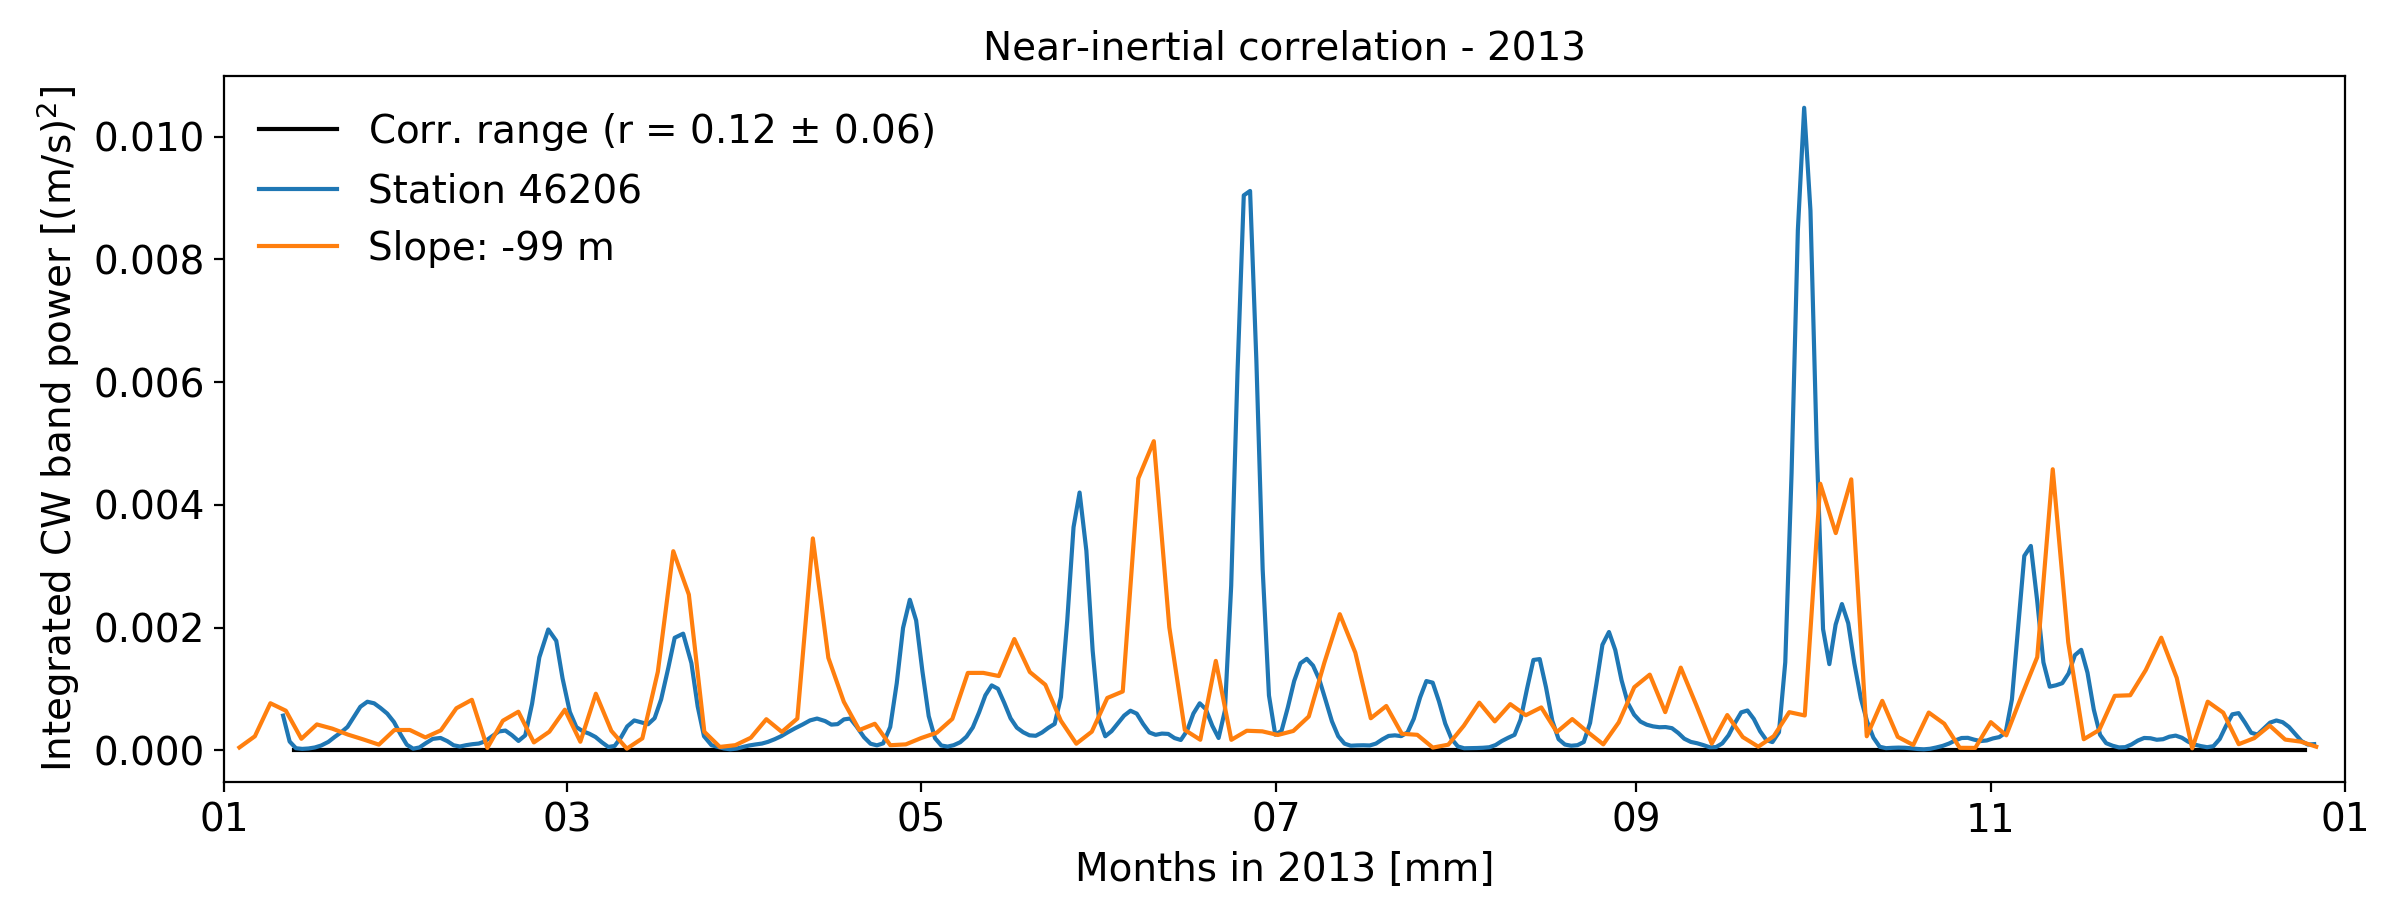

In [100]:
# plot band-passed integrated rotary data

fig, ax0 = plt.subplots(1,1,figsize=(12,4.6),sharex=True,sharey=True)
ax0.set_title(f'Near-inertial correlation - {t_stamp}',fontsize=14)

if adcp == 'Axis75' and year == 2013:
    ax0.plot(testx1,testy1,color='black',lw=1.5,label=f'1st corr. range (r = %.2f $\pm$ %.2f)' % (scorr1,SEr1))
    ax0.plot(testx2,testy2,color='black',lw=1.5,label=f'2nd corr. range (r = %.2f $\pm$ %.2f)' % (scorr2,SEr2))
else:
    ax0.plot(testx,testy,color='black',lw=1.5,label=rf'Corr. range (r = %.2f $\pm$ %.2f)' % (scorr, SEr))

for i in range(cw_seg):
    if i == 0:
        ax0.plot(cw[i].time,cw[i].cw,color='tab:blue',label='Station 46206')
    elif i > 0:
        ax0.plot(cw[i].time,cw[i].cw,color='tab:blue',label='_nolabel_')     
for i in range(site_seg):
    if i == 0:
        ax0.plot(site[i].time,site[i].cw,color='tab:orange',label=f'{adcp}: -{site[0].depth} m')
    elif i > 0:
        ax0.plot(site[i].time,site[i].cw,color='tab:orange',label='_nolabel_')
        
ax0.set_xlabel(f'Months in {t_stamp} [mm]',fontsize=14)
ax0.set_ylabel(r'Integrated CW band power [(m/s)$^2$]',fontsize=14)
date_form = pldates.DateFormatter("%m")
ax0.xaxis.set_major_formatter(date_form)
ax0.set_xlim(start_date,end_date)
ax0.tick_params(labelsize=14)
fig.tight_layout()

plt.legend(fontsize=14,frameon=False)
plt.show()

plt.savefig(fname=f'./wind_corr_{adcp}_{t_stamp}.pdf',format='pdf')

<IPython.core.display.Javascript object>


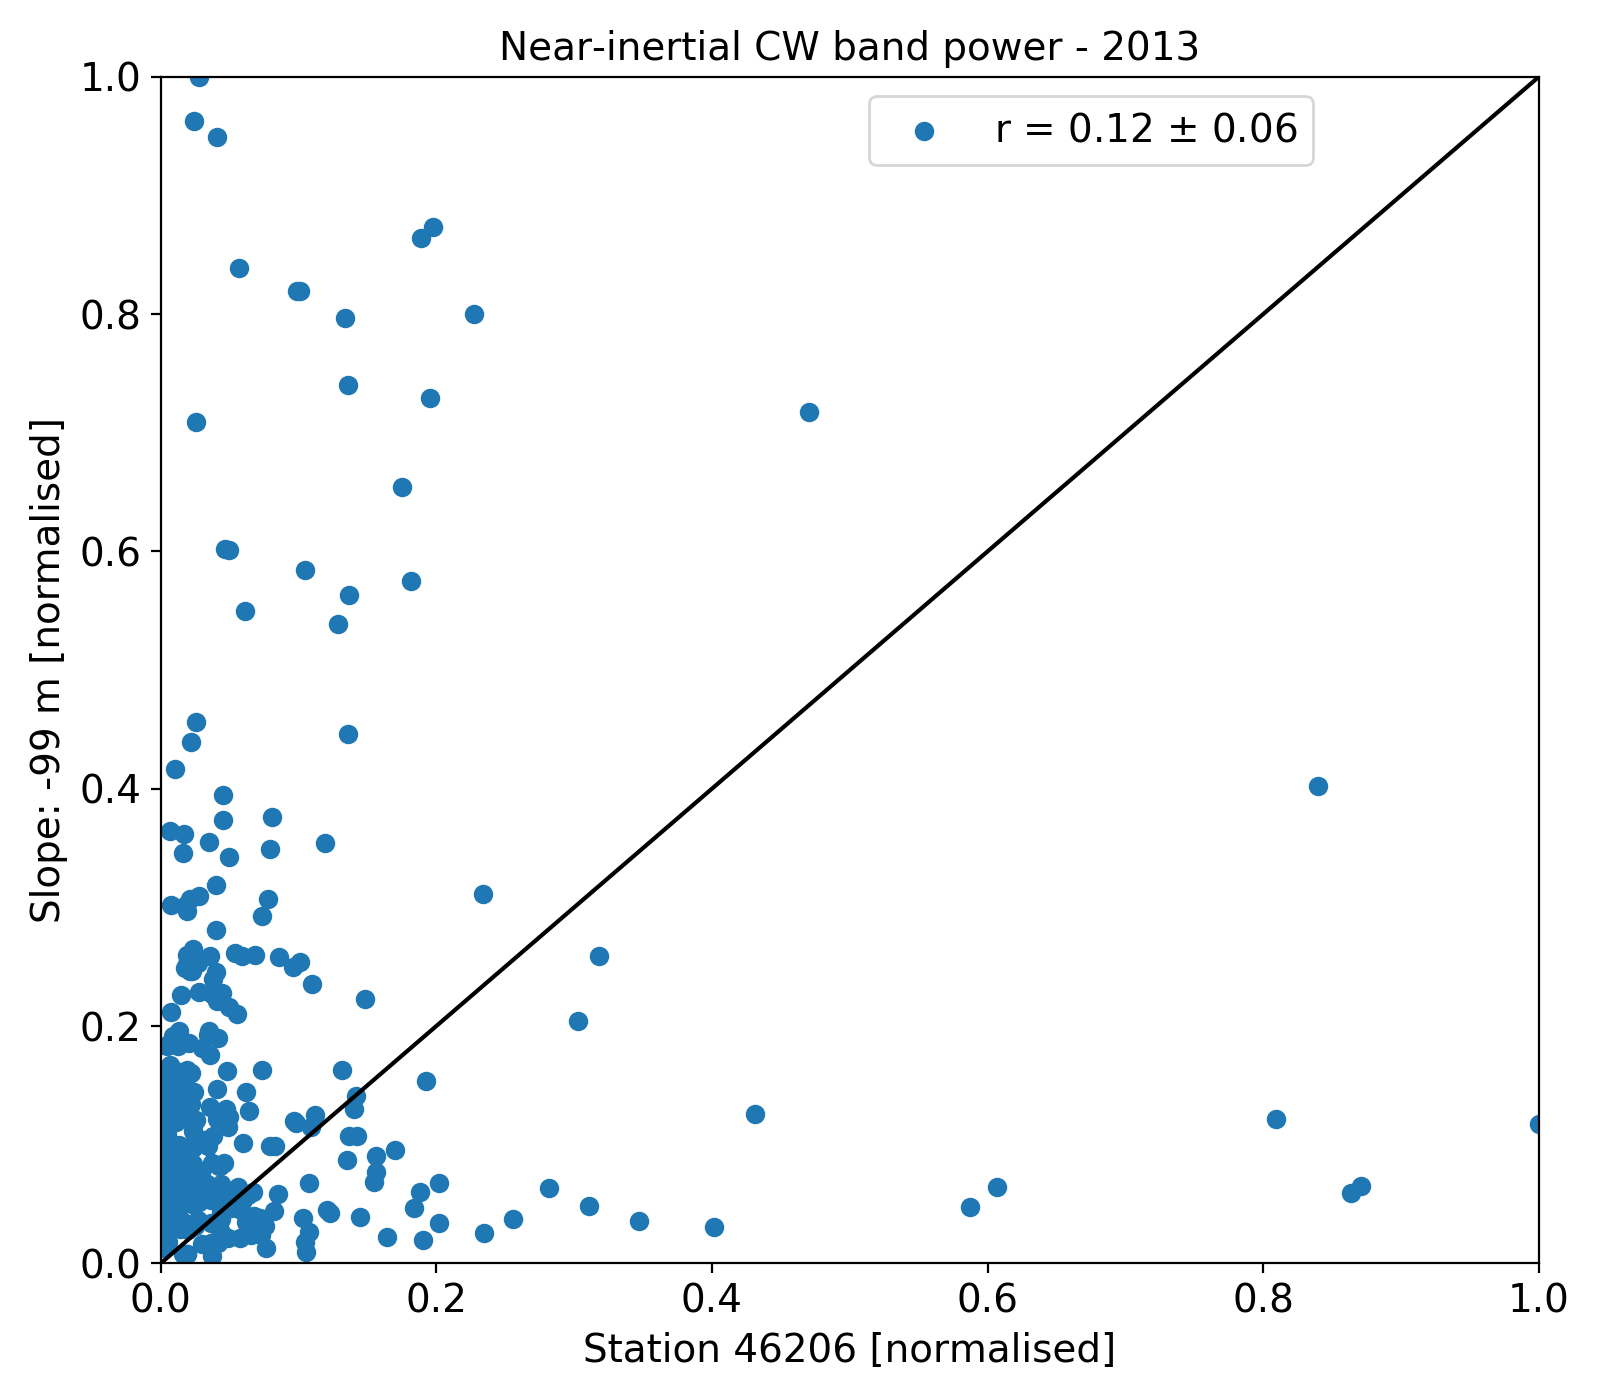

In [101]:
# plot band-passed integrated rotary data

fig, ax0 = plt.subplots(1,1,figsize=(8,7),sharex=True,sharey=True)
ax0.set_title(f'Near-inertial CW band power - {t_stamp}',fontsize=14)

if adcp == 'Axis75' and year == 2013:
    ax0.plot((0,1),(0,1),color='black')
    ax0.scatter(cw_corr1/np.max(cw_corr1),site_int1/np.max(site_int1),\
                color='tab:blue',label=r'r$_{1}$ = %.2f $\pm$ %.2f' % (scorr1,SEr1))
    ax0.scatter(cw_corr2/np.max(cw_corr2),site_int2/np.max(site_int2),\
                color='tab:orange',label='r$_{2}$ = %.2f $\pm$ %.2f' % (scorr2,SEr2))
    ax0.set_ylabel(f'{adcp}: -{site[0].depth} m',fontsize=14)
else:
    ax0.plot((0,1),(0,1),color='black')
    ax0.scatter(cw_corr/np.max(cw_corr),site_int/np.max(site_int),label=f'r = %.2f $\pm$ %.2f' % (scorr,SEr))
    
ax0.set_xlabel(r'Station 46206 [normalised]',fontsize=14)
ax0.set_ylabel(f'{adcp}: -{site[0].depth} m [normalised]',fontsize=14)
ax0.set_xlim(0,1)
ax0.set_ylim(0,1)
ax0.tick_params(labelsize=14)
fig.tight_layout()

plt.legend(fontsize=14,frameon=True,bbox_to_anchor=(0.85, 1), bbox_transform=ax0.transAxes)
plt.show()

plt.savefig(fname=f'./wind_scatter_{adcp}_{t_stamp}.pdf',format='pdf')